In [28]:
#Load packages for data exploration
import os
import glob
from collections import OrderedDict
import pandas as pd
import numpy as np
import pickle
from datetime import datetime
import matplotlib.pyplot as plt


In [29]:
#Make sure working directory is correct
os.chdir(r"C:\Users\Tom\OneDrive\Source\repos\BAC measure")

In [30]:
#Load accelerometer data into a Pandas data frame
filename = r"data\all_accelerometer_data_pids_13.csv"
accel_df = pd.read_csv(filename)
accel_df

,time,pid,x,y,z
0,0,JB3156,0.000000,0.000000,0.000000
1,0,CC6740,0.000000,0.000000,0.000000
2,1493733882409,SA0297,0.075800,0.027300,-0.010200
3,1493733882455,SA0297,-0.035900,0.079400,0.003700
4,1493733882500,SA0297,-0.242700,-0.086100,-0.016300
...,...,...,...,...,...
14057562,1493829248196,CC6740,-0.133956,0.124726,-0.010736
14057563,1493829248220,CC6740,-0.100764,0.180872,0.046449
14057564,1493829248245,CC6740,-0.131853,0.195934,0.181088
14057565,1493829248270,CC6740,-0.149704,0.194482,0.202393


In [31]:
#List out user identifiers
users = ["BK7610", "BU4707", "CC6740", "DC6359", "DK3500", "HV0618", "JB3156", "JR8022", 
         "MC7070", "MJ8002", "PC6771", "SA0297", "SF3079"]

#Retrieve list of file paths for each participant's TAC recording
filenames = glob.glob(os.path.join("data", "clean_tac", "*clean_tac.csv"))

#Create a dictionary, the key is the user identifier and the value is the csv output of their TAC recording
dict_of_df = OrderedDict((os.path.basename(f)[0:6], pd.read_csv(f)) for f in filenames)

#Create a dataframe with the key intact so we can identify each user 
TAC_df = pd.concat(dict_of_df, sort=True)

#Drop the key into a column and replace the original dataframe
TAC_df.reset_index(level=0, inplace=True)
TAC_df.rename(columns={"level_0": "pid"}, inplace=True)


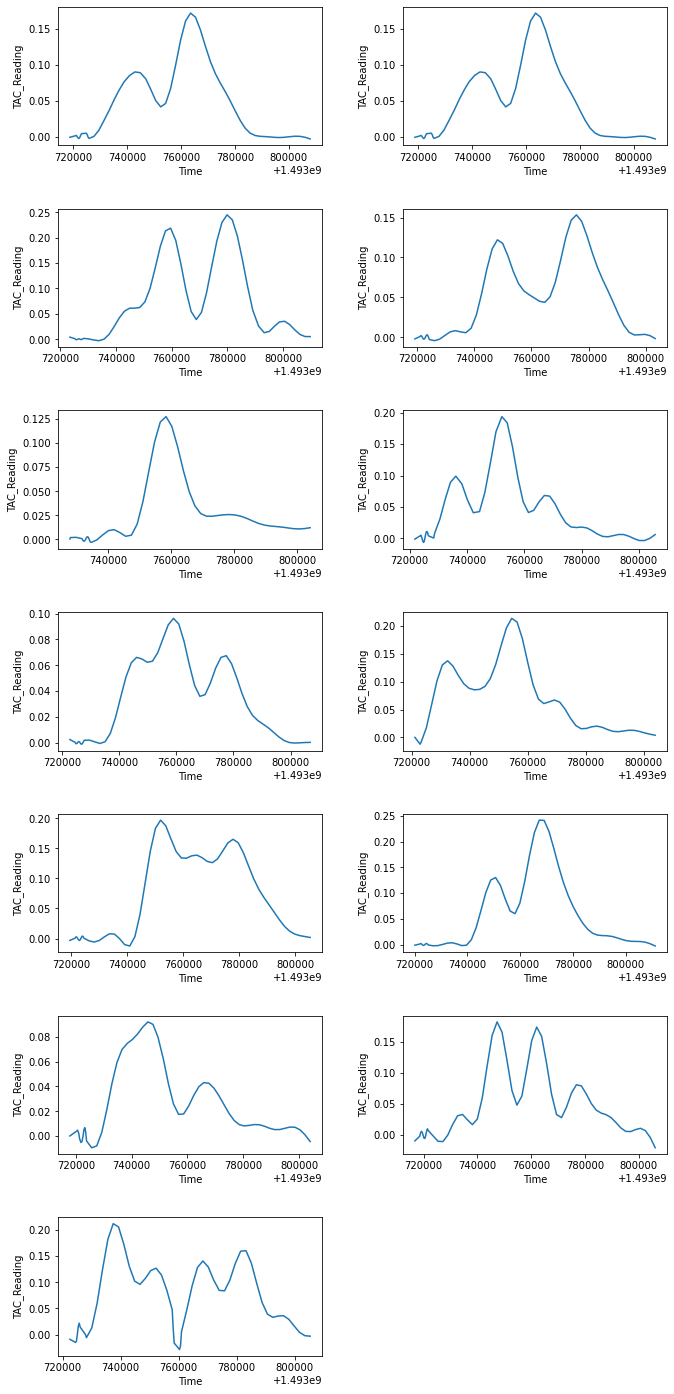

In [32]:

#Plot out timestamp values by pid and for both the TAC and accelemoter tables. Do they all follow the same range. How less frequent is the TAC reading - do we need to calculate a window for the TAC reading?
#Were all the participants on the same bar crawl?
rows=7
columns=2
fig=plt.figure(figsize=(10,20))
for index, u in enumerate(users):
    temp_TAC_df = TAC_df.loc[TAC_df['pid'].str.contains(u)]
    ax = fig.add_subplot(rows, columns, index+1)
    ax.plot(temp_TAC_df["timestamp"],temp_TAC_df["TAC_Reading"])
    plt.xlabel('Time')
    plt.ylabel('TAC_Reading')
    fig.tight_layout(pad=3.0)


In [80]:
#Convert timestamp into a datetime format
TAC_df['datetime'] = pd.to_datetime(TAC_df['timestamp'], unit="s")
TAC_df['timestamp_diff'] = TAC_df['timestamp'].diff() 
TAC_df['timestamp_diff'] = TAC_df['timestamp_diff'].apply(lambda x: 'NaN' if x < 0 else x)
TAC_df.loc[TAC_df['pid'].str.contains("CC6740")].head(20)


,pid,TAC_Reading,timestamp,datetime,timestamp_diff
0,CC6740,0.003947,1493723434,2017-05-02 11:10:34,NaN
1,CC6740,0.000898,1493725257,2017-05-02 11:40:57,1823
2,CC6740,-0.000894,1493725585,2017-05-02 11:46:25,328
3,CC6740,-0.001021,1493725900,2017-05-02 11:51:40,315
4,CC6740,-0.000139,1493726214,2017-05-02 11:56:54,314
5,CC6740,0.000598,1493726528,2017-05-02 12:02:08,314
6,CC6740,0.000457,1493726843,2017-05-02 12:07:23,315
7,CC6740,-0.000335,1493727157,2017-05-02 12:12:37,314
8,CC6740,-0.000855,1493727471,2017-05-02 12:17:51,314
9,CC6740,-0.000387,1493727785,2017-05-02 12:23:05,314


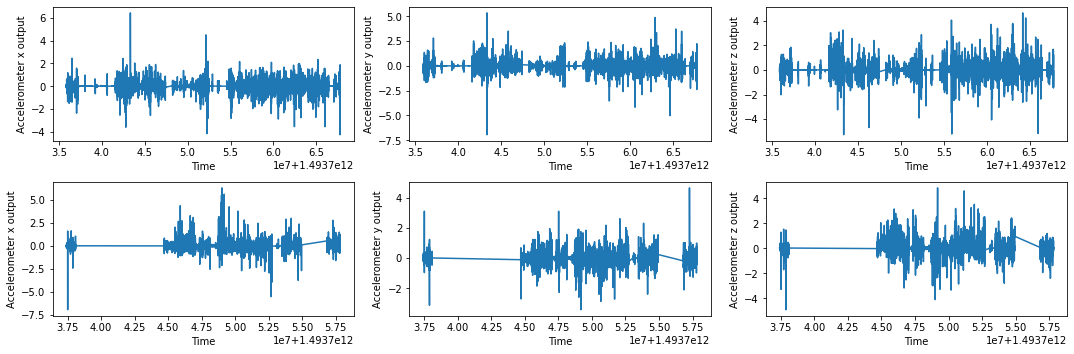

In [37]:
#Plot accellerometer data
fig=plt.figure(figsize=(15,5))
rows=2
columns=3
dimensions = ["x","y","z"]
for u_index, u in enumerate(users[0:2]):
    for d_index, d in enumerate(dimensions):
        temp_accel_df = accel_df.loc[accel_df['pid'].str.contains(u)]
        ax = fig.add_subplot(rows,columns,u_index*3+d_index+1)
        ax.plot(temp_accel_df["time"],temp_accel_df[d])
        plt.xlabel('Time')
        plt.ylabel('Accelerometer {} output'.format(d))
        fig.tight_layout(pad=1.0)


In [83]:
#Convert accelemoter timestamp into a datetime format
accel_df['datetime'] = pd.to_datetime(accel_df['time'], unit="ms")
accel_df['timestamp_diff'] = accel_df['time'].diff() 
accel_df['timestamp_diff'] = accel_df['timestamp_diff'].apply(lambda x: 'NaN' if x < 0 else x)
accel_df.loc[accel_df['pid'].str.contains("DC6359")].head(20)


,time,pid,x,y,z,datetime,timestamp_diff
88314,1493736440950,DC6359,0.0003,-0.0001,0.0038,2017-05-02 14:47:20.950,16.0
88317,1493736440969,DC6359,0.0045,-0.0085,-0.0069,2017-05-02 14:47:20.969,10.0
88320,1493736441001,DC6359,0.0054,0.0149,0.0135,2017-05-02 14:47:21.001,17.0
88323,1493736441023,DC6359,0.0142,0.0195,0.0159,2017-05-02 14:47:21.023,14.0
88326,1493736441054,DC6359,0.0439,0.0052,0.0101,2017-05-02 14:47:21.054,21.0
88329,1493736441075,DC6359,0.0500,0.0202,0.0059,2017-05-02 14:47:21.075,16.0
88332,1493736441105,DC6359,0.0517,0.0238,0.0009,2017-05-02 14:47:21.105,19.0
88335,1493736441128,DC6359,0.0501,0.0272,0.0014,2017-05-02 14:47:21.128,19.0
88340,1493736441159,DC6359,0.0333,0.0193,0.0049,2017-05-02 14:47:21.159,0.0
88341,1493736441180,DC6359,0.0093,-0.0007,-0.0085,2017-05-02 14:47:21.180,21.0
